# The Importance of Linearity in Finance

Nonlinear dynamics plays a vital role in our world. Linear models are often employed in economics due to their simplicity for studies and easier modeling capabilities. In finance, linear models are widely used to help price securities and perform optimal portfolio allocation, among other useful things. One of the significance of linearity in financial modeling is its assurance that a problem terminates at a global optimal solution.

In order to perform prediction and forecasting, regression analysis is widely used in the field of statistics to estimate relationships among variables. With an extensive mathematics library being one of Python's greatest strength, Python is frequently used as a scientific scripting language to aid in these problems. Modules such as the `SciPy` and `NumPy` packages contain a variety of linear regression functions for data scientists to work with.

In traditional portfolio management, the allocation of assets follows a linear pattern, and investors have individual styles of investing. We can state the problem of portfolio allocation into a system of linear equations, containing either equalities or inequalities. These linear systems can then be represented in a matrix form as $Ax$ = $B$, where $A$ is our known coefficient value, $B$ is the observed result, and $x$ is the vector of values that we want to find out. More often than not, $x$ contains the optimal security weights to maximize our utility. Using matrix algebra, we can efficiently solve for $x$ using either direct or indirect methods.

In this chapter, we will cover the following topics:

- Examining the CAPM model with the efficient frontier and capital market line
- Solving for the security market line using regression
- Examining the APT model and performing a multivariate linear regression
- Understanding linear optimization in portfolio allocation
- Linear optimization using the PuLP package
- Understanding the outcomes of linear programming
- Introduction to integer programming
- Implementing a linear integer programming model with binary conditions
- Solving systems of linear equations with equalities using matrix linear algebra
- Solving systems of linear equations directly with the LU, Cholesky, and QR decomposition
- Solving systems of linear equations indirectly with the Jacobi and Gauss-Seidel method

### The capital asset pricing model and the security market line

Many financial literatures devote exclusive discussions to the **capital asset pricing model (CAPM)**. In this section, we will explore the key concepts that highlight the importance of linearity in finance.

In the famous CAPM, the relationship between risk and rates of returns in a security is described as follows:

$$R_i = R_f + \beta_i(R_{mkt} - R_f)$$

For a security $i$ , its returns is defined as $R_i$ and its beta as $\beta_i$. The CAPM defines the return of the security as the sum of the risk-free rate $R_f$ and the multiplication of its beta with the risk premium. The risk premium can be thought of as the market portfolio's excess returns exclusive of the risk-free rate. The following figure is a visual representation of the CAPM:

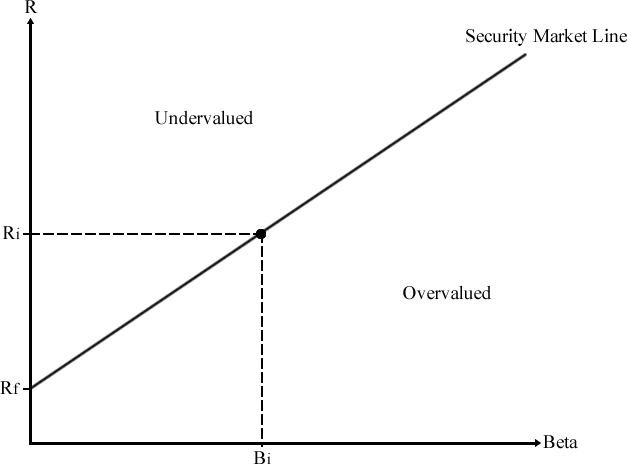

Beta is a measure of the systematic risk of a stock; a risk that cannot be diversified away. In essence, it describes the sensitivity of stock returns with respect to movements in the market. For example, a stock with a beta of zero produces no excess returns regardless of the direction the market moves—it can only grow at the risk-free rate. A stock with a beta of 1 indicates that the stock moves perfectly with the market.

The beta is mathematically derived by dividing the covariance of returns between the stock and the market with the variance of the market returns.

The CAPM model measures the relationship between risk and stock returns for every stock in the portfolio basket. By outlining the sum of this relationship, we obtain combinations or weights of risky securities that produce the lowest portfolio risk for every level of portfolio return. An investor who wishes to receive a particular return would own one such combination of an optimal portfolio that provides the least risk possible. The combinations of optimal portfolios lie along a line called the **efficient frontier**.

Along the efficient frontier, there exists a tangent point that denotes the best optimal portfolio available giving the highest rate of return in exchange for the lowest risk possible. This optimal portfolio at the tangent point is known as the **market portfolio**.

There exists a straight line drawn from the market portfolio to the risk-free rate. This line is called the **capital market line (CML)**. The CML can be thought of as the highest Sharpe ratio available among all the other Sharpe ratios of optimal portfolios. The Sharpe ratio is a risk-adjusted performance measure defined as the portfolio's excess returns over the risk-free rate per unit of its risk in standard deviations. Investors are particularly interested in holding the combinations of assets along the CML line. Let's take a look at the following graphical figure:

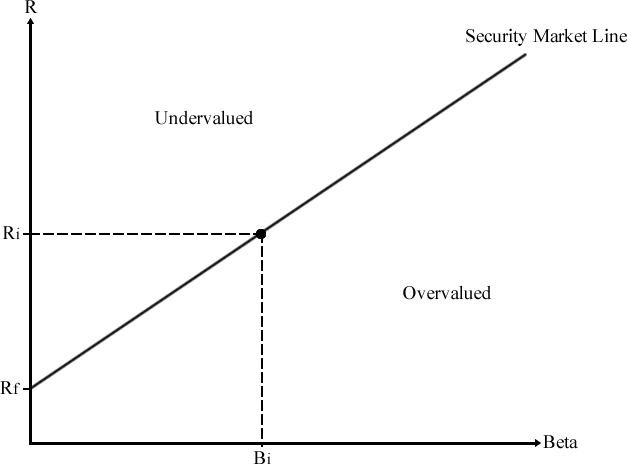

Another line of interest in CAPM studies is the **security market line (SML)**. The SML plots the asset's expected returns against its beta. For a security with a beta value of 1, its returns perfectly match the market's returns. Any security priced above the SML is deemed to be undervalued since investors expect a higher return given the same amount of risk. Conversely, any security priced below the SML is deemed to be overvalued:

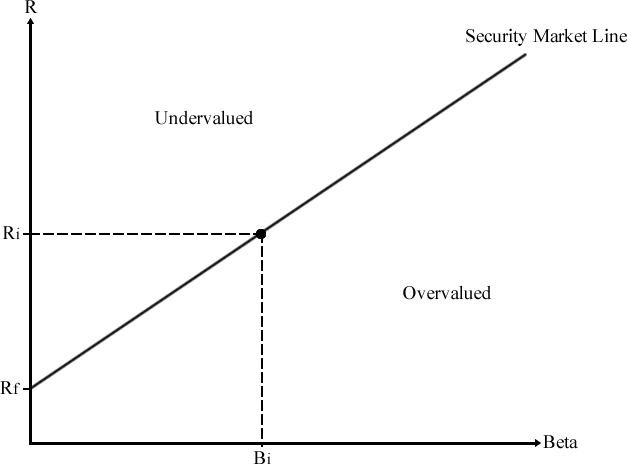

Suppose we are interested in finding the $\beta_i$ of a security. We can regress the company's stock returns $r_i$ against the market's returns $r_M$ along with an intercept $\alpha$ in the form the equation $r_i = \alpha +\beta r_M$.

Consider the set of stock return and market return data measured over five time periods:

| Time period | Stock returns | Market returns |
| ----------- |:-------------:| --------------:|
| 1           | 0.065         | 0.055          |
| 2           | 0.0265        | -0.09          |
| 3           | -0.0593       | -0.041         |
| 4           | -0.001        | 0.045          |
| 5           | 0.0346        | 0.022          |

Using the `stats` module of SciPy, we will perform a least squares regression on the CAPM model, and derive the values of $\alpha$ and $\beta_i$ by running the following code in Python:

In [37]:
""" Linear regression with SciPy """
from scipy import stats

stock_returns = [0.065, 0.0265, -0.0593, -0.001, 0.0346]
mkt_returns = [0.055, -0.09, -0.041, 0.045, 0.022]

beta, alpha, r_value, p_value, std_err = \
    stats.linregress(stock_returns, mkt_returns)

The `scipy.stats.linregress` function returns the slope of the regression line, the intercept of the regression line, the correlation coefficient, the p-value for a hypothesis test with null hypothesis of a zero slope, and the standard error of the estimate. We are interested in finding the slope and intercept of the line:

In [38]:
print (beta, alpha)

0.507743187877 -0.00848190035246


The beta of the stock is 0.5077.

The equation describing the SML can be written as:

$$E(R_i) = R_f + \beta_i[E(R_M)-R_f]$$

The term $E(R_M)-R_f$ is the market risk premium, and $E(R_M)$ is the expected return on the market portfolio. $R_f$ is the return on the risk-free rate, $E(R_i)$ is the expected return on asset $i$ , and $\beta_i$ is the beta of asset.

Suppose the risk-free rate is 5 percent and the market risk premium is 8.5 percent. What is the expected return of the stock? Based on the CAPM, the equity with a beta of 0.5077 would have a risk premium of 0.5077×8.5%, or 4.3 percent. The risk-free rate is 5 percent, so the expected return on the equity is 9.3 percent.

Should the security be observed in the same time period to have a higher return (for example, 10.5 percent) than the expected stock return, the security can be said to be undervalued, since the investor can expect greater return for the same amount of risk.

Conversely, should the return of the security be observed to have a lower return (for example, 7 percent) than the expected return as implied by the SML, the security can be said to be overvalued. The investor receives less return for assuming the
same amount of risk.

### The Arbitrage Pricing Theory model

The CAPM suffers from several limitations, such as the use of a mean-variance framework and the fact that returns are captured by one risk factor—the market risk factor. In a well-diversified portfolio, the unsystematic risk of various stocks cancels out and is essentially eliminated.

The **Arbitrage Pricing Theory (APT)** model was put forward to address these shortcomings and offers a general approach of determining the asset prices other than the mean and variances.

The APT model assumes that the security returns are generated according to multiple factor models, which consist of a linear combination of several systematic risk factors. Such factors could be the inflation rate, GDP growth rate, real interest rates, or dividends.

The equilibrium asset pricing equation according to the APT model is as follows:

$$E[R_i] = \alpha_i + \beta_{i,1} F_1 + \beta_{i,2} F_2 + ... + \beta_{i,j} F_j$$

Here, $E[R_i]$ is the expected rate of return on security $i$ , $\alpha_i$ is the expected return on stock $i$ if all factors are negligible, $\beta_{i,j}$ is the sensitivity of the $i$th asset to the $j$th factor, and $F_j$ is the value of the $j$th factor influencing the return on stock $i$.

Since our goal is to find all values of $\alpha_i$ and $\beta$, we will perform a multivariate linear regression on the APT model.

### Multivariate linear regression of factor models

Many Python packages such as `SciPy` come with several variants of regression functions. In particular, the `statsmodels` package is a complement to `SciPy` with descriptive statistics and estimation of statistical models. The official page for `statsmodels` is http://statsmodels.sourceforge.net/.

In this example, we will use the `ols` function of the `statsmodels` module to perform an ordinary least squares regression and view its summary.

Let's assume that you have implemented an APT model with seven factors that return the values of $Y$. Consider the following set of data collected over 9 time periods, $t1$ to $t9$. $X1$ to $X7$ are independent variables observed at each period. The regression problem is therefore structured as: $Y = X_{l,1}F_1 + X_{l,2}F_2 + ... + X_{l,7}F_7 + c$

A simple ordinary least squares regression on values of $X$ and $Y$ can be performed with the following code:

In [39]:
""" Least squares regression with statsmodels """
import numpy as np
import statsmodels.api as sm

# Generate some sample data
num_periods = 9
all_values = np.array([np.random.random(8)
for i in range(num_periods)])

# Filter the data
y_values = all_values[:, 0] # First column values as Y
x_values = all_values[:, 1:] # All other values as X

x_values = sm.add_constant(x_values) # Include the intercept
results = sm.OLS(y_values, x_values).fit() # Regress and fit the model

Let's view the detailed statistics of the regression:

In [40]:
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                 -2.167
Method:                 Least Squares   F-statistic:                    0.2180
Date:                Thu, 30 Nov 2017   Prob (F-statistic):              0.931
Time:                        12:01:30   Log-Likelihood:                 3.1251
No. Observations:                   9   AIC:                             9.750
Df Residuals:                       1   BIC:                             11.33
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8044      1.088      0.740      0.5

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


The OLS regression results will output a pretty long table of statistical information. However, our interest lies in the particular section that gives us the coefficients of our APT model:

Similarly, we can use the params function to display our coefficients of interest:

In [41]:
print (results.params)

[ 0.80444951  1.04336766 -0.06209397  0.40947477 -1.2936073  -1.49655934
  0.93164096  0.18599715]


Both the function calls produce the same coefficient values for the APT model in the same order.

### Linear optimization

In the CAPM and APT pricing theories, we assumed linearity in the models and solved for expected security prices using regressions in Python.

As the number of securities in our portfolio increases, certain limitations are introduced as well. A portfolio manager would find himself constrained by these rules in pursing certain objectives mandated by investors.

Linear optimization helps you overcome the problem of portfolio allocation. Optimization focuses on minimizing or maximizing the value of the objective functions. The examples are maximizing returns and minimizing volatility. These objectives are usually governed by certain regulations, such as no short-selling rule, limits on the number of securities to be invested, and so on.

Unfortunately, in Python there is no single official package that supports this solution. However, there are third-party packages available with the implementation of the simplex algorithm for linear programming. For the purpose of this demonstration, we will use PuLP, an open source linear programming modeler, to assist us in this particular linear programming problem.

### Getting PuLP

You can obtain PuLP from https://github.com/coin-or/pulp. The project page contains a comprehensive list of documentations to help you get started with your optimization process.

### A simple linear optimization problem

Suppose that we are interested in investing in two securities, $x$ and $y$. We would like to find out the actual number of units to invest for every 3 units of security $X$ and 2 units of security $Y$, such that the total number of units invested is maximized, where possible. However, there are certain constraints on our investment strategy:

- For every 2 units of security $X$ invested and 1 unit of security $Y$ invested, the total volume must not exceed 100
- For every unit of security $X$ and $Y$ invested, the total volume must not exceed 80
- The total volume allowed to invest in security $X$ must not exceed 40
- Short selling is not allowed for both the securities

The maximization problem can be mathematically represented as follows:

Maximize: $$f(x,y) = 3x+2y$$

Subject to :
$$2x + y \leq 100$$

$$x + y \leq 80$$

$$x \leq 40$$

$$x \geq 0, y \geq 0$$

By plotting the constraints on an $x$ by $y$ graph, the set of feasible solutions is shown in the shaded area:

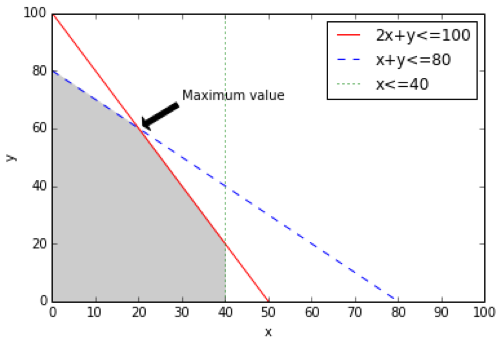

The problem can be translated to Python with the PuLP package:

In [42]:
""" A simple linear optimization problem with 2 variables """
import pulp

x = pulp.LpVariable("x", lowBound=0)
y = pulp.LpVariable("y", lowBound=0)

problem = pulp.LpProblem("A simple maximization objective", pulp.LpMaximize)
problem += 3*x + 2*y, "The objective function"
problem += 2*x + y <= 100, "1st constraint"
problem += x + y <= 80, "2nd constraint"
problem += x <= 40, "3rd constraint"
problem.solve()

1

The `LpVariable` function defines a variable to be solved. The `LpProblem` function initializes the problem with a text description of the problem and the type of optimization, which in this case is the maximization method. The `+=` operation allows an arbitrary number of constraints to be added, along with a text description. Finally, the `solve` function is called to begin performing linear optimization. Each variable value is printed to show the values that the optimizer has solved for us.

The following output is generated when the code runs:

In [43]:
print ("Maximization Results:")

for variable in problem.variables():
    print (variable.name, "=", variable.varValue)

Maximization Results:
x = 20.0
y = 60.0


The results show that obtaining the maximum value of 180 is possible when the value of $x$ is 20 and $y$ is 60 while fulfilling the given set of constraints.

### Outcomes of linear programs

There are three outcomes in linear optimization, as follows:

1. A local optimal solution to a linear program is a feasible solution with a closer objective function value than all other feasible solutions close to it. It may or may not be the global optimal solution, which is a solution that is better than every feasible solution.
2. A linear program is infeasible if a solution cannot be found.
3. A linear program is unbounded if the optimal solution is unbounded or is infinite.

### Integer programming

In the simple optimization problem we have investigated earlier, so far the variables have been allowed to be continuous or fractional. What if the use of fractional values or results is not realistic? This problem is called the **linear integer programming** problem, where all the variables are restricted as integers. A special case of an integer variable is a binary variable that can either be 0 or 1. Binary variables are especially useful to model decision making given a set of choices.

Integer programming models are frequently used in operational research to model real-world working problems. More often than not, stating nonlinear problems in a linear or even binary fashion requires more art than science.

### An example of an integer programming model with binary conditions

Suppose we must go for 150 contracts in a particular over-the-counter exotic security from three dealers. Dealer $X$ quoted `$500` per contract plus handling fees of `$4,000`, regardless of the number of contracts sold. Dealer $Y$ charges `$450` per contract plus a transaction fee of `$2,000`. Dealer $Z$ charges `$450` per contract plus a fee of `$6,000`. Dealer $X$ will sell at most 100 contracts, dealer $Y$ at most 90, and dealer $Z$ at most 70. The minimum transaction volume from any dealer is 30 contracts if any are transacted with that dealer. How should we minimize the cost of purchasing 150 contracts?

Using the `pulp` package, let's set up the required variables:

In [44]:
""" An example of implementing an integer programming model with binary conditions """
import pulp

dealers = ["X", "Y", "Z"]
variable_costs = {"X": 500,
                  "Y": 350,
                  "Z": 450}
fixed_costs = {"X": 4000,
               "Y": 2000,
               "Z": 6000}

# Define PuLP variables to solve
quantities = pulp.LpVariable.dicts("quantity",
                                   dealers,
                                   lowBound=0,
                                   cat=pulp.LpInteger)
is_orders = pulp.LpVariable.dicts("orders",
                                  dealers,
                                  cat=pulp.LpBinary)

The `dealers` variable simply contains the dictionary identifiers that are used to reference lists and dictionaries later on. The `variable_costs` and `fixed_costs` variables are dictionaries that contain their respective contract cost and fees charged by each dealer. The PuLP solver solves for the values of `quantities` and `is_orders`, which are defined by the `LpVariable` function. The `dicts` function tells PuLP to treat the assigned variable as a dictionary object, using the `dealers` variable for referencing. Note that the `quantities` variable has a lower boundary of 0 that prevents us from entering a short position in any securities. The `is_orders` values are treated as binary objects, indicating whether we should enter into a transaction with any of the dealers.

What is the best approach to modeling this integer programming problem? At first glance, this seems fairly straightforward by applying this equation:

$$Minimize \sum_{i=x}^{i=z} IsOrder_i [variable cost_i \times quantity_i + fixed cost_i]$$

Where

$$IsOrder_i = \Bigg\{ \begin{align*} 1,if buying from dealer i\\ 0,if not buying from dealer i\end{align*}$$

$$30 \leq quantity_x \leq 100$$

$$30 \leq quantity_y \leq 90$$

$$30 \leq quantity_z \leq 70$$

$$\sum_{i=x}^{i=z}quantity_i = 150$$

The equation simply states that we want to minimize the total costs with the binary variable $IsOrder_i$, determining whether to account for the costs associated with buying from a specific dealer should we choose to.

Let's implement this model in Python:

In [45]:
""" This is an example of implementing an integer programming model with binary variables the wrong way. """

# Initialize the model with constraints
model = pulp.LpProblem("A cost minimization problem", pulp.LpMinimize)

model += sum([(variable_costs[i] * quantities[i] + fixed_costs[i])*is_orders[i] for i in dealers]), "Minimize portfolio cost"
model += sum([quantities[i] for i in dealers]) == 150, "Total contracts required"
model += 30 <= quantities["X"] <= 100, "Boundary of total volume of X"
model += 30 <= quantities["Y"] <= 90, "Boundary of total volume of Y"
model += 30 <= quantities["Z"] <= 70, "Boundary of total volume of Z"

model.solve()

TypeError: Non-constant expressions cannot be multiplied

What happens when we run the solver?

    TypeError: Non-constant expressions cannot be multiplied

As it turned out, we were trying to perform multiplication on two unknown variables, `quantities` and `is_order`, which unknowingly led us to perform nonlinear programming. Such are the pitfalls encountered when performing integer programming.

### A different approach with binary conditions

Another method of formulating the minimization objective is to place all unknown variables in a linear fashion such that they are additive:

$$Minimize \sum_{i=x}^{i=z}variable cost_i \times quantity_i + fixedcost_i \times IsOrder_i$$

Comparing with the previous objective equation, we would obtain the same fixed cost values. However, the unknown variable $quantity_i$ remains in the first term of the equation. Hence, the variable $quantity_i$ is required to be solved as a function of $IsOrder_i$ such that the constraints are stated as follows:

$$IsOrder_i \times 30 \geq quantity_x \leq IsOrder_i \times 100$$

$$IsOrder_i \times 30 \geq quantity_y \leq IsOrder_i \times 90$$

$$IsOrder_i \times 30 \geq quantity_z \leq IsOrder_i \times 70$$

Let's apply these formulas in Python:

In [46]:
""" This is an example of implementing an IP model with binary variables the correct way. """

# Initialize the model with constraints
model = pulp.LpProblem("A cost minimization problem", pulp.LpMinimize)

model += sum([variable_costs[i]*quantities[i] + fixed_costs[i]*is_orders[i] for i in dealers]), "Minimize portfolio cost"
model += sum([quantities[i] for i in dealers]) == 150, "Total contracts required"
model += is_orders["X"]*30 <= quantities["X"] <= is_orders["X"]*100, "Boundary of total volume of X"
model += is_orders["Y"]*30 <= quantities["Y"] <= is_orders["Y"]*90, "Boundary of total volume of Y"
model += is_orders["Z"]*30 <= quantities["Z"] <= is_orders["Z"]*70, "Boundary of total volume of Z"

model.solve()

1

What happens when we try to run the solver?

In [47]:
print ("Minimization Results:")

for variable in model.variables():
    print (variable, "=", variable.varValue)

print ("Total cost: %s" % pulp.value(model.objective))

Minimization Results:
orders_X = 0.0
orders_Y = 1.0
orders_Z = 1.0
quantity_X = 0.0
quantity_Y = 90.0
quantity_Z = 60.0
Total cost: 66500.0


The output tells us that buying 90 contracts from the dealer Y and 60 contracts from the dealer Z gives us the lowest possible cost of $66,500 while fulfilling all the other constraints.

As we can see, careful planning is required in the designing of integer programming models to arrive at an accurate solution in order for them to be useful in decision making.

### Solving linear equations using matrices

In the previous section, we looked at solving a system of linear equations with inequality constraints. If a set of systematic linear equations has constraints that are deterministic, we can represent the problem as matrices and apply matrix algebra. Matrix methods represent multiple linear equations in a compact manner while using the existing matrix library functions.

Suppose we would like to build a portfolio consisting of 3 securities, $a$, $b$ and $c$. The allocation of the portfolio must meet certain constraints: it must consist of 6 units of a long position in security $a$. With every 2 units of security $a$, 1 unit of security $b$, and 1 unit of security $c$ invested, the net position must be 4 units long. With every 1 unit of security $a$, 3 units of security $b$, and 2 units of security $c$ invested, the net position must be long 5 units.

To find out the number of securities to invest in, we can frame the problem mathematically as follows:

$$2a + b + c = 4$$

$$a + 3b + 2c = 5$$

$$a = 6$$

With all of the coefficients visible, the equations are as follows:

$$2a +1b +1c = 4$$

$$1a + 3b + 2c = 5$$

$$1a + 0b + 0c = 6$$

Taking the coefficients of the equations and representing them in a matrix form:

\begin{equation*}
A =  \begin{vmatrix}
2 & 1 & 1 \\
1 & 3 & 2 \\
1 & 0 & 0
\end{vmatrix},
x =  \begin{vmatrix}
a \\
b \\
c
\end{vmatrix},
B =  \begin{vmatrix}
4 \\
5 \\
6
\end{vmatrix}
\end{equation*}

The linear equations can now be stated as follows:

$$Ax = B$$

To solve for the vector $x$ that contains the number of securities to invest in, the inverse of matrix $A$ is taken and the equation is written as follows:

$$x = A^{−1}B$$

Using the `NumPy` arrays, the $A$ and $B$ matrices are assigned as follows:

In [48]:
""" Linear algebra with NumPy matrices """
import numpy as np

A = np.array([[2, 1, 1],
              [1, 3, 2],
              [1, 0, 0]])
B = np.array([4, 5, 6])

We can use the `linalg.solve` function of `NumPy` to solve a system of linear scalar equations:

In [49]:
print (np.linalg.solve(A, B))

[  6.  15. -23.]


The portfolio would require a long position of 6 units of security $a$, 15 units of security $b$, and a short position of 23 units of security $c$.

In portfolio management, we can use the matrix system of equations to solve for optimal weight allocations of securities, given a set of constraints. As the number of securities in the portfolio increases, the size of matrix $A$ increases and it becomes computationally expensive to compute the matrix inversion of $A$. Thus, one may consider methods such as the Cholesky decomposition, LU decomposition, QR decomposition, the Jacobi method, or the Gauss-Seidel method to break down matrix $A$ into simpler matrices for factorization.

### The LU decomposition

The **LU decomposition**, or also known as **lower upper factorization**, is one of the methods of solving square systems of linear equations. As its name implies, the LU factorization decomposes matrix $A$ into a product of two matrices: a lower triangular matrix $L$ and an upper triangular matrix $U$. The decomposition can be represented as follows:

$$A = LU$$

\begin{equation*}
\begin{vmatrix}
a & b & c \\
d & e & f \\
g & h & i
\end{vmatrix} = 
\begin{vmatrix}
l_{11} & 0 & 0 \\
l_{21} & l_{22} & 0 \\
l_{31} & l_{32} & l_{32}
\end{vmatrix} \times
\begin{vmatrix}
u_{11} & u_{12} & u_{13} \\
0 & u_{22} & u_{23} \\
0 & 0 & u_{33}
\end{vmatrix}
\end{equation*}

Here, we can see $a=l_{11}u_{11}$, $b=l_{11}u_{12}$, and so on. A lower triangular matrix is a matrix that contains values in its lower triangle with the remaining upper triangle populated with zeros. The converse is true for an upper triangular matrix.

The definite advantage of the LU decomposition method over the Cholesky decomposition method is that it works for any square matrices. The latter method only works for symmetric and positive definite matrices.

Remember the previous example of a 3 by 3 matrix $A$. This time, though, we will use the `linalg` package of the `SciPy` module for the LU decomposition:

In [50]:
""" LU decomposition with SciPy """
import scipy.linalg as linalg
import numpy as np

A = np.array([[2., 1., 1.],
              [1., 3., 2.],
              [1., 0., 0.]])

B = np.array([4., 5., 6.])

LU = linalg.lu_factor(A)

x = linalg.lu_solve(LU, B)

To view the values of $x$, execute the following command:

In [51]:
print (x)

[  6.  15. -23.]


We get the same values of 6, 15, and -23 for $a$, $b$, and $c$ respectively.

Note that we used the `lu_factor` function of `scipy.linalg` here, which gives the `LU` variable as the pivoted LU decomposition of matrix $A$. We used the `lu_solve` function that takes in the pivoted LU decomposition and the vector $B$ to solve the equation system.

We can display the LU decomposition of matrix $A$ using the `lu` function. The `lu` function returns three variables : the permutation matrix $P$, the lower triangular matrix $L$, and the upper triangular matrix $U$, individually:

In [52]:
P, L, U = linalg.lu(A)

print(P)
print(L)
print(U)

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
[[ 1.   0.   0. ]
 [ 0.5  1.   0. ]
 [ 0.5 -0.2  1. ]]
[[ 2.   1.   1. ]
 [ 0.   2.5  1.5]
 [ 0.   0.  -0.2]]


When we print out these variables, we can conclude the relationship between the LU factorization and matrix $A$ as follows:

\begin{equation*}
A = \begin{vmatrix}
2 & 1 & 1 \\
1 & 3 & 2 \\
1 & 0 & 0
\end{vmatrix} = \begin{vmatrix}
1 & 0 & 0 \\
0.5 & 1 & 0 \\
0.5 & -0.2 & 1
\end{vmatrix} \times \begin{vmatrix}
2 & 1 & 1 \\
0 & 2.5 & 1.5 \\
0 & 0 & -0.2
\end{vmatrix}
\end{equation*}

The LU decomposition can be viewed as the matrix form of Gaussian elimination performed on two simpler matrices: the upper triangular and lower triangular matrices.

### The Cholesky decomposition

The Cholesky decomposition is another way of solving systems of linear equations. It can be significantly faster and uses a lot of less memory than the LU decomposition by exploiting the property of symmetric matrices. However, it is required that the matrix being decomposed be Hermitian (or real-valued symmetric and thus square) and positive definite. This means that when the matrix $A$ is decomposed as $A = LL^T$, $L$ is a lower triangular matrix with real and positive numbers on the diagonals, and $L^T$ is the conjugate transpose of $L$.

Let's consider another example of a system of linear equations where matrix $A$ is both Hermitian and positive definite. Again, the equation is in the form of $Ax = B$, where $A$ and $B$ take the following values:

\begin{equation*}
A = \begin{vmatrix}
10 & -1 & 2 & 0 \\
-1 & 11 & -1 & 3 \\
2 & -1 & 10 & -1 \\
0 & 3 & -1 & 8
\end{vmatrix},x = \begin{vmatrix}
a \\
b \\
c \\
d
\end{vmatrix},b =  \begin{vmatrix}
6 \\
25 \\
-11 \\
15
\end{vmatrix}
\end{equation*}

Let's represent these matrices as the `NumPy` arrays:

In [53]:
""" Cholesky decomposition with NumPy """
import numpy as np

A = np.array([[10., -1., 2., 0.],
              [-1., 11., -1., 3.],
              [2., -1., 10., -1.],
              [0.0, 3., -1., 8.]])

B = np.array([6., 25., -11., 15.])

L = np.linalg.cholesky(A)

The `cholesky` function of `numpy.linalg` would compute the lower triangular factor of matrix $A$. Let's view the lower triangular matrix:

In [54]:
print (L)

[[ 3.16227766  0.          0.          0.        ]
 [-0.31622777  3.3015148   0.          0.        ]
 [ 0.63245553 -0.24231301  3.08889696  0.        ]
 [ 0.          0.9086738  -0.25245792  2.6665665 ]]


To verify that the Cholesky decomposition results are correct, we can use the definition of the Cholesky factorization by multiplying $L$ with its conjugate transpose that will lead us back to the values of matrix $A$:

In [55]:
print (np.dot(L, L.T.conj())) # A=L.L*

[[ 10.  -1.   2.   0.]
 [ -1.  11.  -1.   3.]
 [  2.  -1.  10.  -1.]
 [  0.   3.  -1.   8.]]


Before solving for $x$, we need to solve for $L^T x$ as $y$. We will use the `solve` function of `numpy.linalg`:

In [56]:
y = np.linalg.solve(L, B) # L.L*.x=B; When L*.x=y, then L.y=B

To solve for $x$, all we need to do is to solve again using the conjugate transpose of $L$ and $y$:

In [57]:
x = np.linalg.solve(L.T.conj(), y) # x=L*'.y

Let's print our result of $x$:

In [58]:
print (x)

[ 1.  2. -1.  1.]


The output gives us our values of $x$ for $a$, $b$, $c$, and $d$.

To show that the Cholesky factorization gives us the correct values, we can verify the answer by multiplying the matrix $A$ by the transpose of $x$ to return the values of $B$:

In [59]:
print (np.mat(A) * np.mat(x).T) # B=Ax

[[  6.]
 [ 25.]
 [-11.]
 [ 15.]]


This shows that the values of $x$ by the Cholesky decomposition would lead to the same values given by $B$.

### The QR decomposition

The QR decomposition, also known as the QR factorization, is another method of solving linear systems of equations using matrices, very much like the LU decomposition. The equation to solve is in the form of $Ax = B$, where matrix $A = QR$. Except in this case, $A$ is a product of an orthogonal matrix $Q$ and upper triangular matrix $R$. The QR algorithm is commonly used to solve the linear least squares problem.

An orthogonal matrix exhibits the following properties:

- It is a square matrix
- Multiplying an orthogonal matrix by its transpose returns the identity matrix:

$$QQ^T = Q^TQ = 1$$

- The inverse of an orthogonal matrix equals its transpose:

$$Q^T = Q^{-1}$$

An identity matrix is also a square matrix with its main diagonal containing ones and zeros elsewhere.

We can now restate the problem $Ax = B$ as follows:

$$QRx = B$$

$$Rx = Q^{-1}B or Rx = Q^TB$$

Using the same variables in the LU decomposition example, we will use the `qr` function of `scipy.linalg` to compute our values of $Q$ and $R$, and let the variable $y$ represent our value of $BQ^T$ with the following code:

In [63]:
""" QR decomposition with scipy """
import scipy.linalg as linalg
import numpy as np

A = np.array([[2., 1., 1.],
              [1., 3., 2.],
              [1., 0., 0]])

B = np.array([4., 5., 6.])

Q, R = linalg.qr(A) # QR decomposition

y = np.dot(Q.T, B) # Let y=Q'.B

x = linalg.solve(R, y) # Solve Rx=y

Note that `Q.T` is simply the transpose of $Q$, which is also the same as the inverse of $Q$.

In [65]:
print (x)

[  6.  15. -23.]


We get the same answers similar to those in the LU decomposition example.

### Solving with other matrix algebra methods

So far, we have looked at the use of matrix inversion, the LU decomposition, the Cholesky decomposition, and QR decomposition to solve for systems of linear equations. Should the size of our financial data in matrix $A$ be large, it can be broken down by a number of schemes so that the solution can converge more quickly using matrix algebra. Quantitative portfolio analysts ought to be familiar with these discussed methods.

In some circumstances, the solution that we are looking for might not converge. Therefore, one might consider the use of iterative methods. The common methods of solving systems of linear equations iteratively are the Jacobi method, the Gauss-Seidel method, and the SOR method. We will take a brief look at the examples in implementing the Jacobi and the Gauss-Seidel method.

### The Jacobi method

The Jacobi method solves a system of linear equations iteratively along its diagonal elements. The iteration procedure terminates when the solution converges. Again, the equation to solve is in the form of $Ax = B$, where $A$ can be decomposed into a diagonal component $D$ and remainder $R$ such that $A = D + R$. Let's take a look at the example of a 4 by 4 matrix $A$:

\begin{equation*}
A = \begin{vmatrix}
a & b & c & d \\
e & f & g & h \\
i & j & k & l \\
m & n & o & p
\end{vmatrix} = \begin{vmatrix}
a & 0 & 0 & 0 \\
0 & f & 0 & 0 \\
0 & 0 & k & 0 \\
0 & 0 & 0 & p
\end{vmatrix} = \begin{vmatrix}
0 & b & c & d \\
e & 0 & g & h \\
i & j & 0 & l \\
m & n & o & 0
\end{vmatrix}
\end{equation*}

The solution is then obtained iteratively as follows:

$$Ax = B$$

$$(D + R)x = B$$

$$Dx = B − Rx$$

$$x_{n+1} = D^1(B-Rx_n)$$

As opposed to the Gauss-Siedel method, the value of $x_n$ in the Jacobi method is needed during each iteration in order to compute x_{n+1} and cannot be overwritten. This would take up twice the amount of storage. However, the computations for each element can be done in parallel, which is useful for faster computations.

If matrix $A$ is strictly irreducibly diagonally dominant, this method is guaranteed to converge. A strictly irreducibly diagonally dominant matrix is one where the absolute diagonal element in every row is greater than the sum of the absolute values of other terms.

In some circumstances, the Jacobi method can converge even if these conditions are not met. The Python code is given as follows:

In [66]:
""" Solve Ax=B with the Jacobi method """
import numpy as np

def jacobi(A, B, n, tol=1e-10): 
    # Initializes x with zeroes with same shape and type as B
    x = np.zeros_like(B)
    
    for it_count in range(n):
        x_new = np.zeros_like(x)
        for i in range(A.shape[0]):
            s1 = np.dot(A[i, :i], x[:i])
            s2 = np.dot(A[i, i + 1:], x[i + 1:])
            x_new[i] = (B[i] - s1 - s2) / A[i, i]
        
        if np.allclose(x, x_new, tol):
            break
        
        x = x_new
    return x

Consider the same matrix values in the Cholesky decomposition example. We will use 25 iterations in our `jacobi` function to find the values of $x$.

In [67]:
A = np.array([[10., -1., 2., 0.],
              [-1., 11., -1., 3.],
              [2., -1., 10., -1.],
              [0.0, 3., -1., 8.]])

B = np.array([6., 25., -11., 15.])

n = 25

After initializing the values, we can now call the function and solve for $x$:

In [69]:
x = jacobi(A, B, n)

print ("x =", x)

x = [ 1.  2. -1.  1.]


We solved for the values of $x$, which are similar to the answers from the Cholesky decomposition.

### The Gauss-Seidel method

The Gauss-Seidel method works very much like the Jacobi method. It is another way of solving a square system of linear equations using an iterative procedure with the equation in the form of $Ax = B$. Here, the matrix $A$ is decomposed as $A = L + U$, where the matrix $A$ is a sum of a lower triangular matrix $L$ and an upper triangular matrix $U$. Let's take a look at the example of a 4 by 4 matrix $A$:

\begin{equation*}
A = \begin{vmatrix}
a & b & c & d \\
e & f & g & h \\
i & j & k & l \\
m & n & o & p
\end{vmatrix} = \begin{vmatrix}
a & 0 & 0 & 0 \\
e & f & 0 & 0 \\
i & j & k & 0 \\
m & n & o & p
\end{vmatrix} + \begin{vmatrix}
0 & b & c & d \\
0 & 0 & g & h \\
0 & 0 & 0 & l \\
0 & 0 & 0 & 0
\end{vmatrix}
\end{equation*}

The solution is then obtained iteratively as follows:

$$Ax = B$$

$$(L + U)x = B$$

$$Lx = B − Ux$$

$$X_{n+1} = L^{-1}(B - Ux_n)$$

Using a lower triangular matrix $L$, where zeroes fill up the upper triangle, the elements of $x_n$ can be overwritten in each iteration in order to compute $x_{n+1}$. This results in the advantage of needing half the storage required when using the Jacobi method.

The rate of convergence in the Gauss-Seidel method largely lies in the properties of matrix $A$, especially if matrix $A$ is needed to be strictly diagonally dominant or symmetric positive definite. Even if these conditions are not met, the Gauss-Seidel method may converge.

The Python implementation of the Gauss-Seidel method is given as follows:

In [70]:
""" Solve Ax=B with the Gauss-Seidel method """
import numpy as np

def gauss(A, B, n, tol=1e-10):
    L = np.tril(A) # Returns the lower triangular matrix of A
    U = A - L # Decompose A = L + U
    L_inv = np.linalg.inv(L)
    x = np.zeros_like(B)
    
    for i in range(n):
        Ux = np.dot(U, x)
        x_new = np.dot(L_inv, B - Ux)
        
        if np.allclose(x, x_new, tol):
            break
        x = x_new
    return x

Here, the `tril` function of NumPy returns the lower triangular matrix $A$ from which we can find the lower triangular matrix $U$. Plugging the remaining values into $x$ iteratively would lead us to the solution below with some tolerance defined by `tol`.

Let's consider the same matrix values in the Jacobi method and Cholesky decomposition example. We will use a maximum of 100 iterations in our `guass` function to find the values of $x$ as follows:

In [71]:
A = np.array([[10., -1., 2., 0.],
              [-1., 11., -1., 3.],
              [2., -1., 10., -1.],
              [0.0, 3., -1., 8.]])

B = np.array([6., 25., -11., 15.])

n = 100

x = gauss(A, B, n)

Let's see if our $x$ values match with those as before:

In [72]:
print ("x =", x)

x = [ 1.  2. -1.  1.]


We solved for the values of $x$, which are similar to the answers from the Jacobi method and Cholesky decomposition.

### Summary

In this chapter, we took a brief look at the use of the CAPM model and APT model in finance. In the CAPM model, we visited the efficient frontier with the capital market line to determine the optimal portfolio and the market portfolio. Then, we solved for the security market line using regression that helped us to determine whether an asset is undervalued or overvalued. In the APT model, we explored how various factors affect security returns other than using the mean-variance framework. We performed a multivariate regression to help us determine the coefficients of these factors that led to the valuation of our security price.

In portfolio allocation, portfolio managers are typically mandated by investors to achieve a set of objectives while following certain constraints. We can model this problem using linear programming. Using the PuLP Python package, we defined a maximization or minimization objective function, and added inequality constraints to our problems to solve for unknown variables. The three outcomes in linear optimization can either be an unbounded solution, only one solution, or no solution at all.

Another form of linear optimization is integer programming, where all the variables are restricted to be integers instead of fractional values. A special case of an integer variable is a binary variable, which can either be 0 or 1, and it is especially useful to model decision making given a set of choices. We worked on a simple integer programming model containing binary conditions and saw how easy it is to run into a pitfall. Careful planning on the design of integer programming models is required for them to be useful in decision making.

The portfolio allocation problem may also be represented as a system of linear equations with equalities, which can be solved using matrices in the form of $Ax = B$. To find the values of $x$, we solved for $A_{−1B}$ using various types of decomposition of the matrix $A$. The two types of matrix decomposition methods are the direct and indirect methods. The direct method performs matrix algebra in a fixed number of iterations. They are namely the LU decomposition, Cholesky decomposition, and QR decomposition methods. The indirect or iterative method iteratively computes the next values of $x$ until a certain tolerance of accuracy is reached. This method is particularly useful for computing large matrices, but it also faces the risk of not having the solution converge. The indirect methods we have used are the Jacobi method and the Gauss-Seidel method.

In the next chapter, we will take a look at nonlinear models and methods of solving them.